## Computation ACME-Pandas 1
### 7. Pandas I: Introduction 


* #### August 1, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

> **pd.Series()** 

(index=[] , name="") 

* pd.Series.values 
* pd.Series.dtype 
* pd.Series.index 
* pd.Series.name 

Initialize a Series from a dictionary. 

Slicing and fancy indexing (regulary position-based or label index) 

In [2]:
# Get a pd.Series from dictionary 
s3 = pd.Series({"lions":2, "tigers":1, "bears":3}, name = "oh my")
# Get a subset of the data using fancy indexing 
s3[np.array([len(i) == 5 for i in s3.index])]

# Result: [True, False, True]

lions    2
bears    3
Name: oh my, dtype: int64

In [3]:
s3

lions     2
tigers    1
bears     3
Name: oh my, dtype: int64

In [4]:
# Get a subset of the data by providing several index labels. 
s3[["tigers", "bears"]] 

tigers    1
bears     3
Name: oh my, dtype: int64

In [5]:
s3[["bears", "tigers"]]

bears     3
tigers    1
Name: oh my, dtype: int64

### Problem 1 

Create a pandas Series where the **index** labels are the even integers 0; 2; : : : ; 50,and the **entries** are $n^2-1$ , where n is the **entry’s label**. 

*Set all of the entries equal to zero whose labels are divisible by 3.*

In [6]:
entry = [i for i in range(0, 51, 2)]
s1 = pd.Series(np.array([x**2-1 for x in entry]), index = entry)
s1[np.array([k%3 == 0 for k in s1.index])] = 0
s1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

### Problem 2 

Simulate the daily change of the stock by making one draw from a
Bernoulli distribution. 

In [7]:
def investment(p, d=100): 
    '''
    p: probability parameter with which the value of stock will go up by $1, or down by $1 of 1-p.  
    d: investment of d dollors at the start. 
    
    Question: or I should set s[0] as everyday of the additional 
    s[0] = s[0] + d
    '''
    # create index of days 
    time = pd.date_range("1/1/2000", "12/31/2000", freq = "D")
    # make one draw each day from Bernoulli distribution
    draws = np.random.binomial(1, p, size = len(time))
    # create Series of draw 
    s = pd.Series(draws, index = time)
    s[0] = d 
    s = s.cumsum()
    # set negative values to 0 
    s[s < 0] = 0 
    
    s.plot()
    plt.ylabel("Investment")
    plt.xlabel("Date")
    plt.title("Stock Market: Random Walk Simulation")
    plt.show()
    

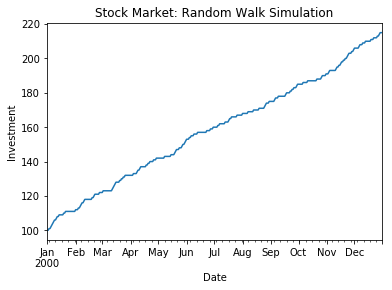

In [8]:
investment(0.3)

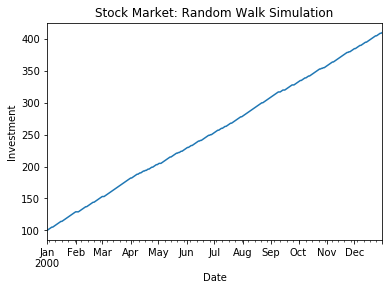

In [9]:
investment(0.85)

> **Data Frame** 

collection of Series
two-dimensional NumPy array 

* pd.DataFrame.index
* pd.DataFrame.columns
* pd.DataFrame.dropna
* pd.DataFrame.describe
* pd.DataFrame.head(10)

> **Location** 

* ```loc``` index selects rows and columns based on their *labels*. 
* ```iloc``` method selects rows and columns based on their integer *positions*. 
* pd.DataFrame.isin()

In [10]:
df = pd.DataFrame(np.random.randn(4, 2), index=['a', 'b', 'c', 'd']
                  , columns = ['I', 'II'])
print(df)
print("\t")
print(df.loc[['a', 'c'], 'II'])  # select rows a and c, column II
print("\t")
print(df.iloc[2:, 0])            # select rows a and b, column I 
print("\t")
print(df['II'])     # or, equivalently, df.II; get second column 

          I        II
a -0.098677 -0.965863
b -1.903950  0.769725
c -1.148110 -0.584297
d -1.883404  0.648669
	
a   -0.965863
c   -0.584297
Name: II, dtype: float64
	
c   -1.148110
d   -1.883404
Name: I, dtype: float64
	
a   -0.965863
b    0.769725
c   -0.584297
d    0.648669
Name: II, dtype: float64


### Problem 3 
```
{SQL} 
SELECT..FROM.. 
WHERE 
```

In [11]:
# build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi'
        , 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex
                            , 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd
                         , 'Math_Major': major}) 
mathInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
ID            5 non-null int64
Grade         5 non-null float64
Math_Major    5 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [12]:
# SELECT ID, GPA FROM otherInfo WHERE Financial_Aid = 'y' 
otherInfo[otherInfo['Financial_Aid'] == "y"][['ID', 'GPA']]

,ID,GPA
0,0,3.8
3,3,3.9
7,7,3.4


In [13]:
# SELECT Name FROM studentInfo WHERE Class = 'J' OR Class = 'Sp'
studentInfo[studentInfo['Class'].isin(["J", "Sp"])][['Name']]

,Name
0,Mylan
4,Jason
5,Remi
6,Matt
7,Alexander


In [14]:
studentInfo[studentInfo['Class'].isin(["J", "Sp"])]['Name']
# Why the difference? 
# one is <class 'pandas.core.frame.DataFrame'>, other is 
# <class 'pandas.core.series.Series'>

0        Mylan
4        Jason
5         Remi
6         Matt
7    Alexander
Name: Name, dtype: object

In [15]:
# SELECT ID, Name FROM studentInfo WHERE Age > 19 AND Sex = 'M'
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == "M")][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


```WHERE``` condition: & (AND), | (OR), and ~ (NOT) 

```JOIN``` statement: the column on which to join, along with the type (left, right, inner, outer) 

### Problem 4 
```
INNER JOIN 
FULL OUTER JOIN..ON.. 
```

In [16]:
# SELECT * FROM studentInfo INNER JOIN mathInfo ON studentInfo.ID = mathInfo.ID 
pd.merge(studentInfo, mathInfo, on = "ID")   # default INNER JOIN 

,ID,Name,Sex,Age,Class,Grade,Math_Major
0,0,Mylan,M,20,Sp,4.0,y
1,1,Regan,F,21,Se,3.0,n
2,3,Jess,F,22,Se,4.0,n
3,5,Remi,F,20,J,3.5,y
4,6,Matt,M,20,J,3.0,n


In [17]:
# SELECT GPA, Grade FROM otherInfo FULL OUTER JOIN mathInfo ON otherInfo.ID = mathInfo.ID 
pd.merge(otherInfo, mathInfo, on = "ID", how = "outer")[['GPA', 'Grade']]

,GPA,Grade
0,3.8,4.0
1,3.5,3.0
2,3.0,NaN
3,3.9,4.0
4,2.8,NaN
5,2.9,3.5
6,3.8,3.0
7,3.4,NaN
8,3.7,NaN


In [18]:
# SELECT ID, Age, GPA FROM otherInfo INNER JOIN studentInfo on otherInfo.ID = studentID.ID WHERE Sex = 'M'
pd.merge(otherInfo, studentInfo[studentInfo['Sex'] == "M"], on = "ID", how = "inner")[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


> **Manipulation** 

* df.transpose
* df.reindex(index = []) 
* df.sort_values('', ascending = False/True)
* df.dropna()
* df.fillna(0)    fill missing data with 0 